In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import graphviz
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
matplotlib.rc("font", family = "Malgun Gothic")
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [2]:
df_raw = pd.read_csv("체질검사.csv")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [3]:
#데이터 구성
df_y = df_raw["FAT"]
df_x = df_raw.drop("FAT", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size = 0.7, test_size = 0.3, random_state = 1234)

In [4]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 0.981
Scoring on test set: 0.581


In [6]:
train_score = []; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1, 50)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234,
                                n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.586
6,70,0.963,0.587
7,80,0.970,0.581
8,90,0.976,0.582
9,100,0.981,0.581


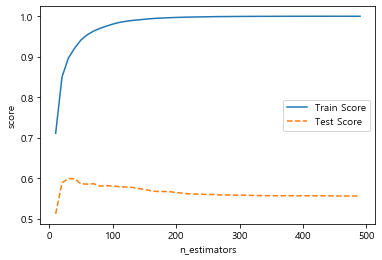

In [7]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [8]:
train_score = []; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1, 41)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234,
                                n_estimators = 2,
                              min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.263,0.174
1,2,0.263,0.174
2,3,0.261,0.177
3,4,0.261,0.177
4,5,0.260,0.176
5,6,0.259,0.179
6,7,0.259,0.179
7,8,0.257,0.184
8,9,0.257,0.165
9,10,0.256,0.175


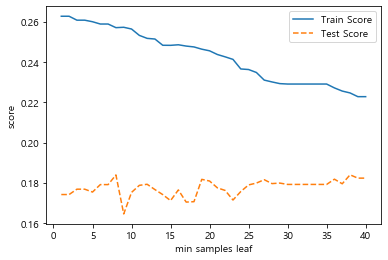

In [9]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [12]:
train_score = []; test_score = []
para_split = [n_split*2 for n_split in range(1, 41)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234,
                                  n_estimators = 2,
                                  min_samples_leaf = 7 ,
                                  min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSampleLeaf"] = para_split
df_score_split['TrainScore'] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,2,0.259,0.179
1,4,0.259,0.179
2,6,0.259,0.179
3,8,0.259,0.179
4,10,0.259,0.179
5,12,0.259,0.179
6,14,0.259,0.179
7,16,0.259,0.179
8,18,0.259,0.179
9,20,0.259,0.179


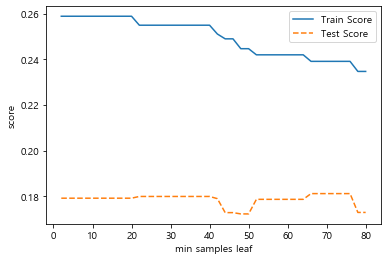

In [13]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [15]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 40)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234,
                                min_samples_leaf = 7 ,
                                min_samples_split = 19,
                                max_depth = v_max_depth,
                                  n_estimators = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.178,0.117
1,2,0.235,0.173
2,3,0.259,0.179
3,4,0.274,0.187
4,5,0.283,0.189
5,6,0.284,0.190
6,7,0.286,0.188
7,8,0.286,0.188
8,9,0.286,0.188
9,10,0.286,0.188


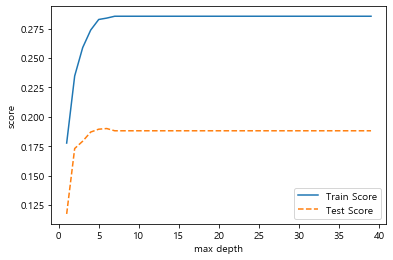

In [16]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [20]:
train_score = []; test_score = []
para_lr = [lr+0.1 for lr in range(1, 30)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234,
                                   min_samples_leaf = 7,
                                   min_samples_split = 19,
                                   max_depth = 5,
                                   n_estimators = 2,
                                   learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr["TestScore"] = test_score
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,1.1,0.871,0.463
1,2.1,-0.375,-0.656
2,3.1,-15.068,-12.183
3,4.1,-74.471,-60.670
4,5.1,-230.348,-188.154
5,6.1,-552.493,-452.629
6,7.1,-1131.426,-928.499
7,8.1,-2076.988,-1706.275
8,9.1,-3518.634,-2892.623
9,10.1,-5605.427,-4610.368


C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


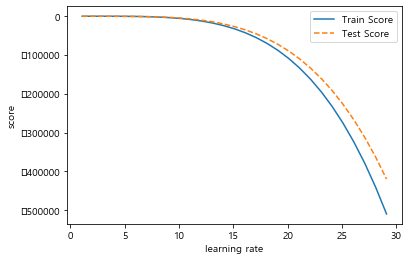

In [21]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

In [22]:
gb_final = GradientBoostingRegressor(min_samples_leaf = 7, min_samples_split = 19, max_depth = 5, learning_rate = 0.1, random_state = 1234, n_estimators = 2)
gb_final.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Scoring on training set: 0.283
Scoring on test set: 0.189


In [23]:
gb_final = GradientBoostingRegressor(min_samples_leaf = 11, min_samples_split = 22, max_depth = 4, learning_rate = 0.1, random_state = 1234, n_estimators = 30)
gb_final.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Scoring on training set: 0.900
Scoring on test set: 0.629


In [ ]:
gb_final = GradientBoostingRegressor(min_samples_leaf = 11, min_samples_split = 22, max_depth = 100, learning_rate = 0.1, random_state = 1234, n_estimators = 8)
gb_final.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

In [24]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.775
2,HEIGHT,0.038
12,WRIST,0.025
3,NECK,0.023
6,HIP,0.021
4,CHEST,0.021
0,AGE,0.021
7,THIGH,0.020
8,KNEE,0.017
10,BICEPS,0.014


Text(0, 0.5, '변수')

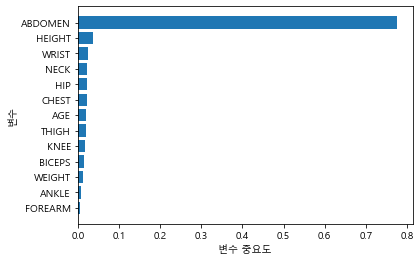

In [25]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [ ]:
estimator = GradientBoostingRegressor(random_state = 1234)
param_grid = {"criterion": ['mse', 'friedman_mse', 'mae'], "max_features": ["auto", "sqrt", 'log2'],
             "max_depth": para_depth, "min_samples_leaf": para_leaf, "learning_rate": para_lr}

grid_gb = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

In [ ]:
import statsmodels.fomula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred) / y_true)) * 100

In [ ]:
df_raw = pd.read_csv("체질검사.csv")
df_raw.head()

In [ ]:
#데이터 구성
df_y = df_raw["FAT"]
df_x = df_raw.drop("FAT", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size = 0.7, test_size = 0.3, random_state = 1234)

In [ ]:
lr_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

dt_model = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split = 20, max_depth = 4)
df_model.fit(df_train_x, df_train_y)

rf_model = RandomForesteRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 6, min_samples_split = 14, max_depth = 4)
rf_model.fit(df_train_x, df_train_y)

gb_model = GradientBoostingRegressor(random_state = 1234, n_estimators = 30, min_samples_leaf = 11, min_samples_split = 22, max_depth = 4, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)


In [ ]:
models = ["회귀분석", "의사결정나무" , "랜덤 포레스트", "그래디언트 부스팅"]
mse, rmse, mae, mape = [], [], [], []

In [ ]:
lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
rmape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [ ]:
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
rmape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [ ]:
rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
rmape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [ ]:
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
rmape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

In [ ]:
fig, ax = plt.subplot(2,2, figsize = (13, 10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse")..set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse")..set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae")..set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape")..set_fontsize(15)

In [1]:
from sklearn.decomposition import PCA
import statsmodels.api as sm

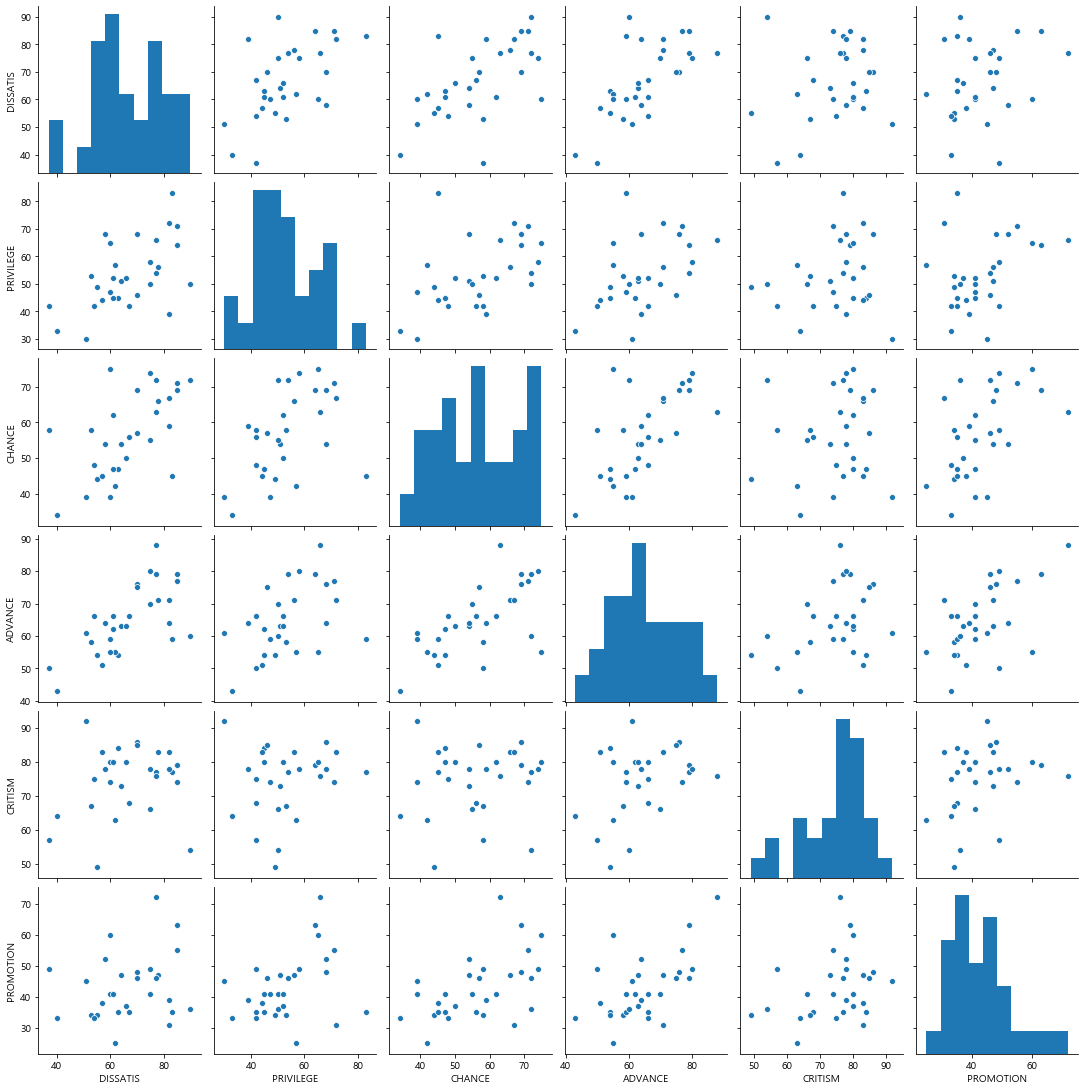

In [4]:
df_raw = pd.read_csv("직무능력평가.csv")
df_raw_x = df_raw.drop("EVAL", axis = 1)
df_raw_y = df_raw["EVAL"]
sns.pairplot(df_raw_x)

In [5]:
df_raw_x.describe().round(3)
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print("Scaled Data :\n {}".format(nd_scaled[:5].round(3)))
print("Shape: \n {}".format(nd_scaled.shape))

Scaled Data :
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape: 
 (30, 6)


In [6]:
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [7]:
pca = PCA(n_components = 6)
nd_pca = pca.fit_transform(df_scaled)
print("PCA Data :\n {}".format(nd_pca[:5]))
print("Shape :\n {}".format(nd_pca.shape))

PCA Data :
 [[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape :
 (30, 6)


In [8]:
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [15]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [l for l in range(1,7)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


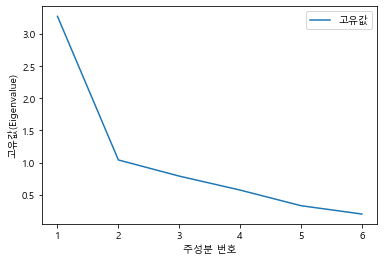

In [16]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label = "고유값")
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

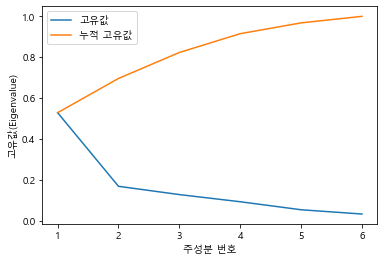

In [17]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"], label = "고유값")
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"], label = "누적 고유값")

plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

In [20]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,
                                                columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


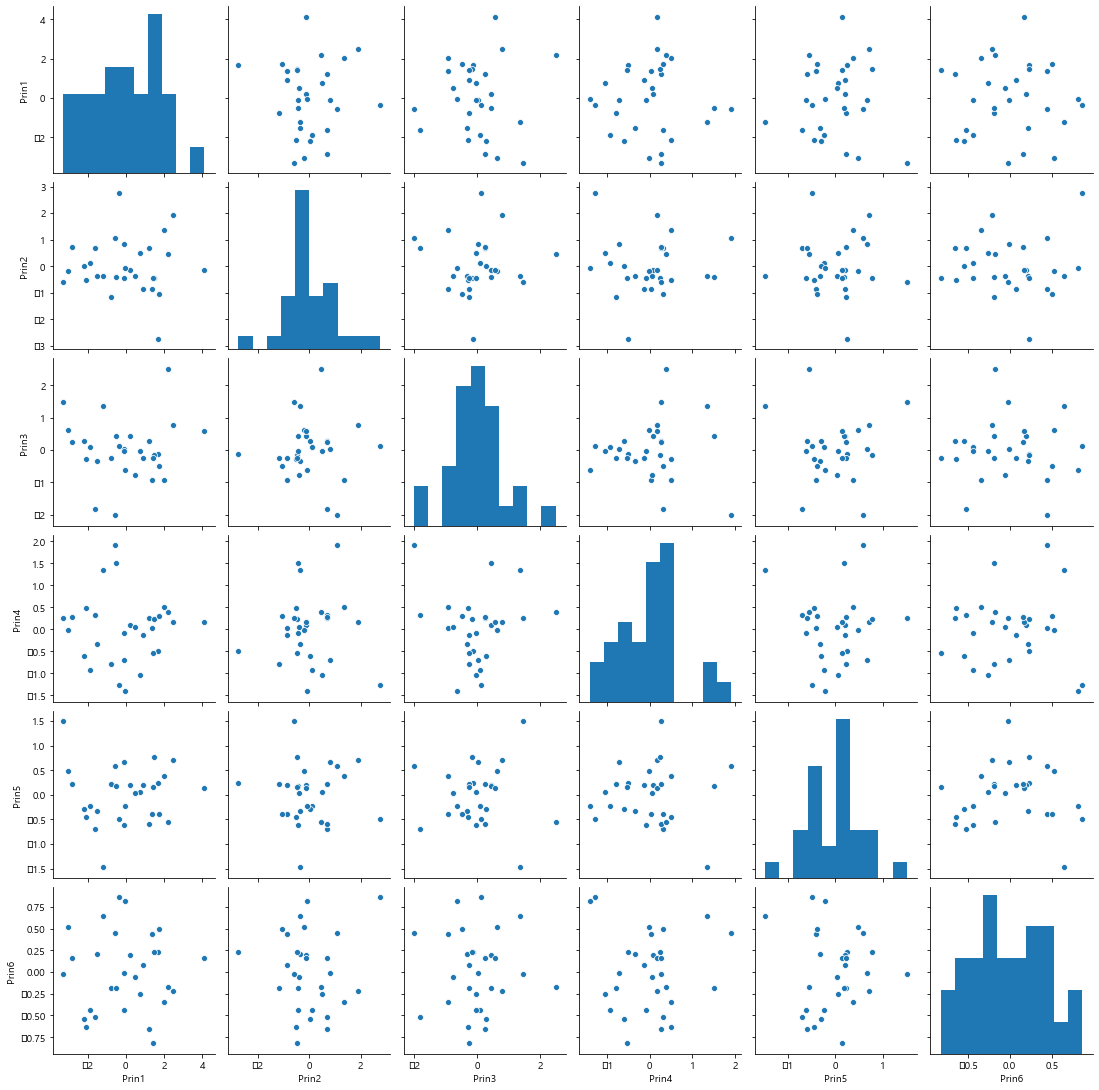

In [10]:
sns.pairplot(df_pca)

In [13]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,0.0,0.0
Prin2,0.0,1.0,0.0,0.0,0.0,-0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,0.0
Prin4,-0.0,0.0,0.0,1.0,0.0,0.0
Prin5,0.0,0.0,0.0,0.0,1.0,0.0
Prin6,0.0,-0.0,0.0,0.0,0.0,1.0


In [11]:
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           1.24e-05
Time:                        00:13:47   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [12]:
x_var = ["Prin1", "Prin2", "Prin3"]
df_pca_const = sm.add_constant(df_pca[x_var])
reg_model = sm.OLS(df_raw_y, df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           1.02e-05
Time:                        00:14:49   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

In [21]:
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [22]:
df_raw = pd.read_csv("환율.csv", parse_dates = ["APPL_DATE"])
df_raw.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


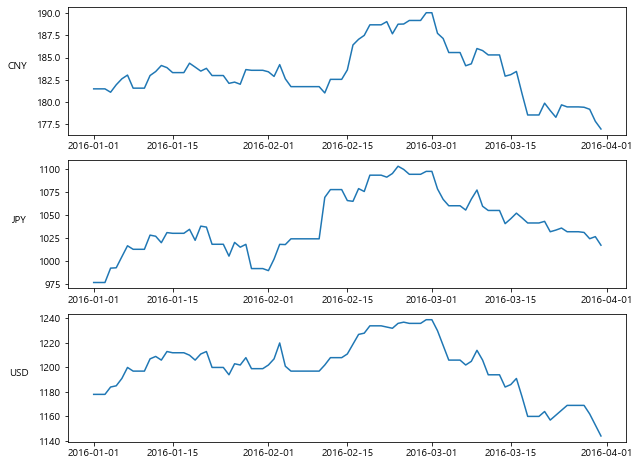

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 8))
for (ax, idx, currency) in zip([ax1, ax2, ax3], [311, 312, 313], ["CNY", "JPY", "USD"]):
    ax.plot("APPL_DATE", "STD_RATE", data = df_raw[df_raw["CURRENCY"] == currency])
    ax.set_ylabel(currency, rotation = 0, labelpad = 20)

In [24]:
df_CNY = df_raw[df_raw["CURRENCY"] == "CNY"].set_index("APPL_DATE")
df_CNY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

df_JPY = df_raw[df_raw["CURRENCY"] == "JPY"].set_index("APPL_DATE")
df_JPY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

df_USD = df_raw[df_raw["CURRENCY"] == "USD"].set_index("APPL_DATE")
df_USD.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

df_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


In [27]:
train_size = 0.9
len_idx = len(df_CNY.index)
mask = (np.arange(len_idx) / len_idx) < train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [28]:
df_CNY_train = df_CNY[mask]
df_CNY_test = df_CNY[~mask]
print("shape of train data: {}".format(df_CNY_train.shape))
print("shape of test data: {}".format(df_CNY_test.shape))

shape of train data: (82, 1)
shape of test data: (9, 1)


C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


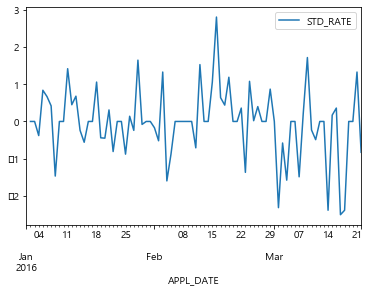

In [29]:
df_CNY_diff1 = df_CNY_train - df_CNY_train.shift(1)
df_CNY_diff1.plot()

C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


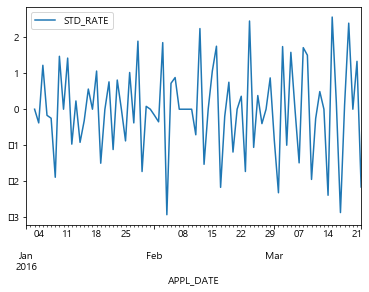

In [30]:
df_CNY_diff2 = df_CNY_train -2*(df_CNY_train.shift(1)) + df_CNY_train.shift(2)
df_CNY_diff2.plot()

C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


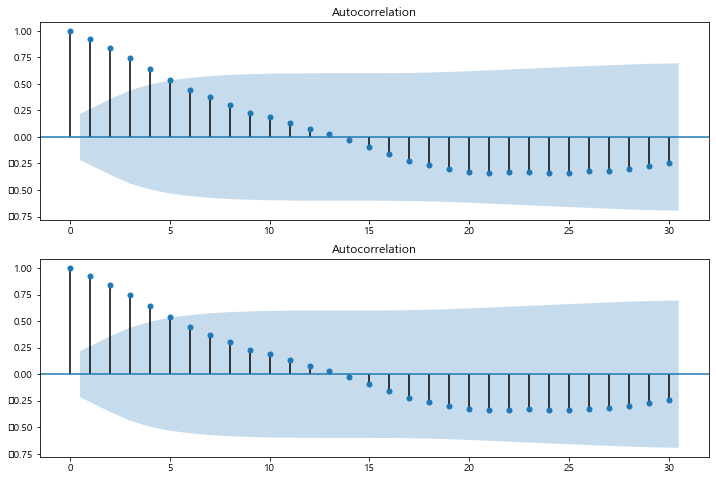

In [31]:
lag_size = 30
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_CNY_train["STD_RATE"], lags = lag_size, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_acf(df_CNY_train["STD_RATE"], lags = lag_size, ax = ax2)

In [32]:
ts_model_cny = ARIMA(df_CNY_train, order = (1,2,0))
ts_result_cny = ts_model_cny.fit(trend = "c", full_output = True)
print(ts_result_cny.summary())

C:\Users\cptas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\cptas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   80
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.512
Method:                       css-mle   S.D. of innovations              1.132
Date:                Wed, 09 Sep 2020   AIC                            253.025
Time:                        01:23:02   BIC                            260.171
Sample:                    01-03-2016   HQIC                           255.890
                         - 03-22-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0022      0.088     -0.024      0.981      -0.175       0.171
ar.L1.D2.STD_RATE    -0.4389      0.102     -4.322      0.000      -0.638      -0.240
                        

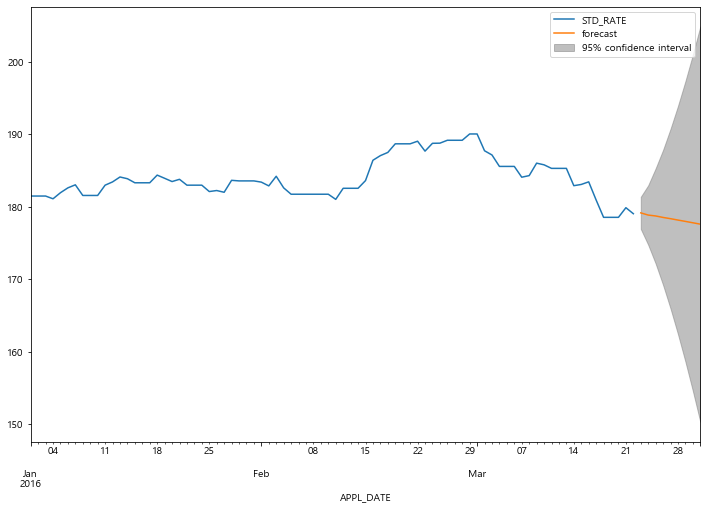

In [33]:
start_time = df_CNY_test.index.min()
end_time = df_CNY_test.index.max()
fig, ax = plt.subplots(figsize = (12, 8))

ax = df_CNY_train.plot(ax = ax)
fig = ts_result_cny.plot_predict(start = start_time, end = end_time, ax = ax, plot_insample = False)

In [34]:
start_time = pd.to_datetime("2016-01-03")
y_pred = ts_result_cny.predict(start = start_time, end = end_time, typ = 'levels')
df_merge = df_CNY
df_merge["예측값"] = y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.477844
2016-01-04,181.10,181.476897
2016-01-05,181.94,180.883667


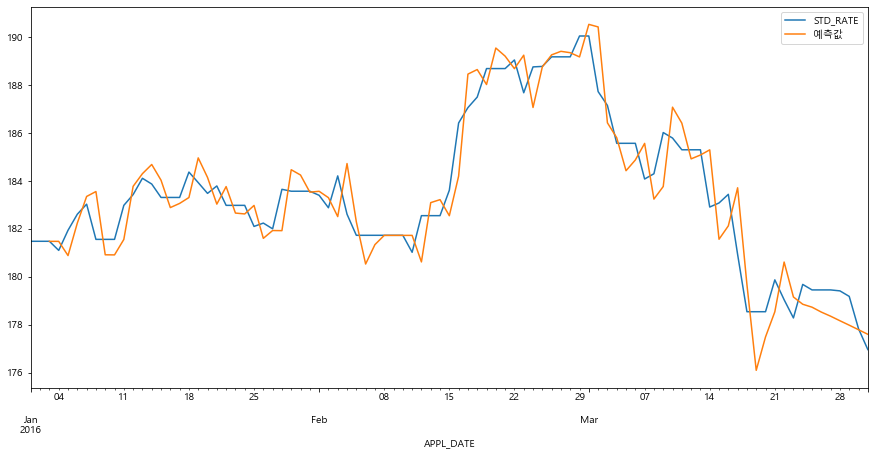

In [35]:
df_merge.plot(y = ["STD_RATE", "예측값"], figsize = (15, 7))